In [198]:
!pip install imblearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [488]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [124]:
import re
import nltk
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import  SnowballStemmer
from nltk.stem import PorterStemmer
import nltk.tokenize
import os
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import string
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC
import xgboost as xgb
import seaborn as sns
import keras.backend as K
from keras.layers import Dense, GlobalAveragePooling1D, Embedding,Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset.csv") #Читаем
data

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
7,worry,Hmmm. http://www.djhero.com/ is down
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?


In [181]:
emotions = data.sentiment.unique()
data_new = data
for i in emotions:
    tmp = data[data.sentiment == i]
    k = 0
    while((len(tmp)-k)>3000):
        if((len(tmp)-k)%500==0):
            print(len(tmp)-k)
        data_new = data_new.drop(tmp.index[k])
        k = k + 1


4500
4000
3500
6000
5500
5000
4500
4000
3500
7000
6500
6000
5500
5000
4500
4000
3500


In [123]:
data_new

,sentiment,content,proc_content
0,empty,@tiffanylue i know i was listenin to bad habi...,i know i wa listenin to bad habit earlier and...
3,enthusiasm,wants to hang out with friends SOON!,want to hang out with friend soon
44,empty,@creyes middle school and elem. High schools w...,middl school and elem high school will remain...
52,empty,@djmicdamn hey yu lil fucker i textd yu,hey yu lil fucker i textd yu
56,enthusiasm,"bed...sorta. today was good, sara has strep th...",bed sorta today wa good sara ha strep thought...
112,boredom,i'm so tired,i m so tire
141,empty,@softtouchme just answered you- never learned ...,just answer you never learn how to write in f...
180,empty,Have a headache I'm going to bed. Goodnight!,have a headach i m go to bed goodnight
203,empty,@DymeDiva23 Nite. Now I'm up n bored as oppose...,nite now i m up n bore as oppos to almost sle...
238,empty,"@TheTombert i was watching Harpers Island, lol...",i wa watch harper island lol there wa no vodk...


In [8]:
emotions #Посмотрел какие есть классы

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [278]:
count_emotions = []
for i in emotions:
    count_emotions.append(data[data.sentiment == i].count()[0])

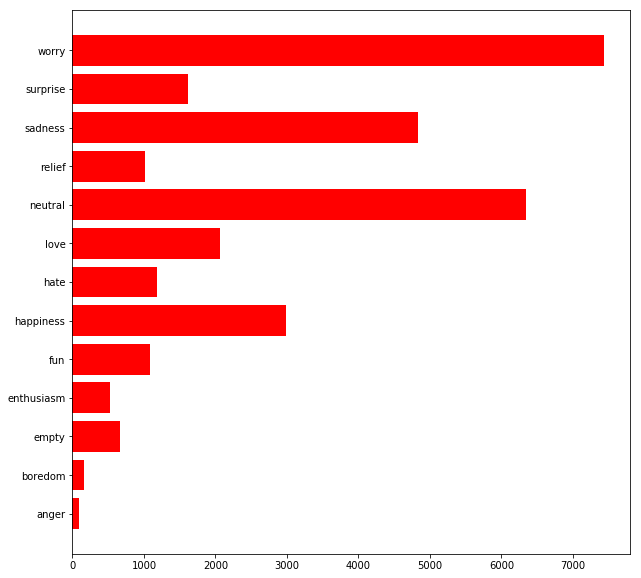

In [280]:
fig, ax = plt.subplots(figsize=(10,10)) #Посмотрел распределние по классам
rects = ax.barh(emotions,count_emotions, color='r')
plt.show()

#Данные сильно не сбалансированные, что в дальнейшем сказывается на обучение.

In [282]:
all_words = train['content'].str.split(expand=True).unstack().value_counts()
all_words

to                  8741
I                   8263
the                 7271
a                   5536
my                  4476
i                   4084
and                 3970
is                  3267
in                  3161
you                 3122
for                 3088
it                  2733
of                  2695
on                  2331
have                2247
me                  1982
so                  1933
that                1866
but                 1841
be                  1826
at                  1598
with                1591
I'm                 1555
was                 1527
not                 1492
just                1464
get                 1267
this                1182
like                1126
out                 1068
                    ... 
draw,                  1
WIndows                1
my!...It's             1
wonderfully            1
%$&amp;!               1
@Kingsrockandrol       1
woot,                  1
schooliooo!            1
life-ruin              1


In [232]:
def word_count(row):
    #Функция подсчета количества слов в каждом твите
    text = row['content']
    text_splited = text.split(' ')
    word_count = text_splited.__len__()
    return word_count

data['word_count'] = ''
data['word_count'] = data.apply(lambda row: word_count(row), axis =1)
data['word_count'] = data.apply(lambda row: word_count(row), axis =1)

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

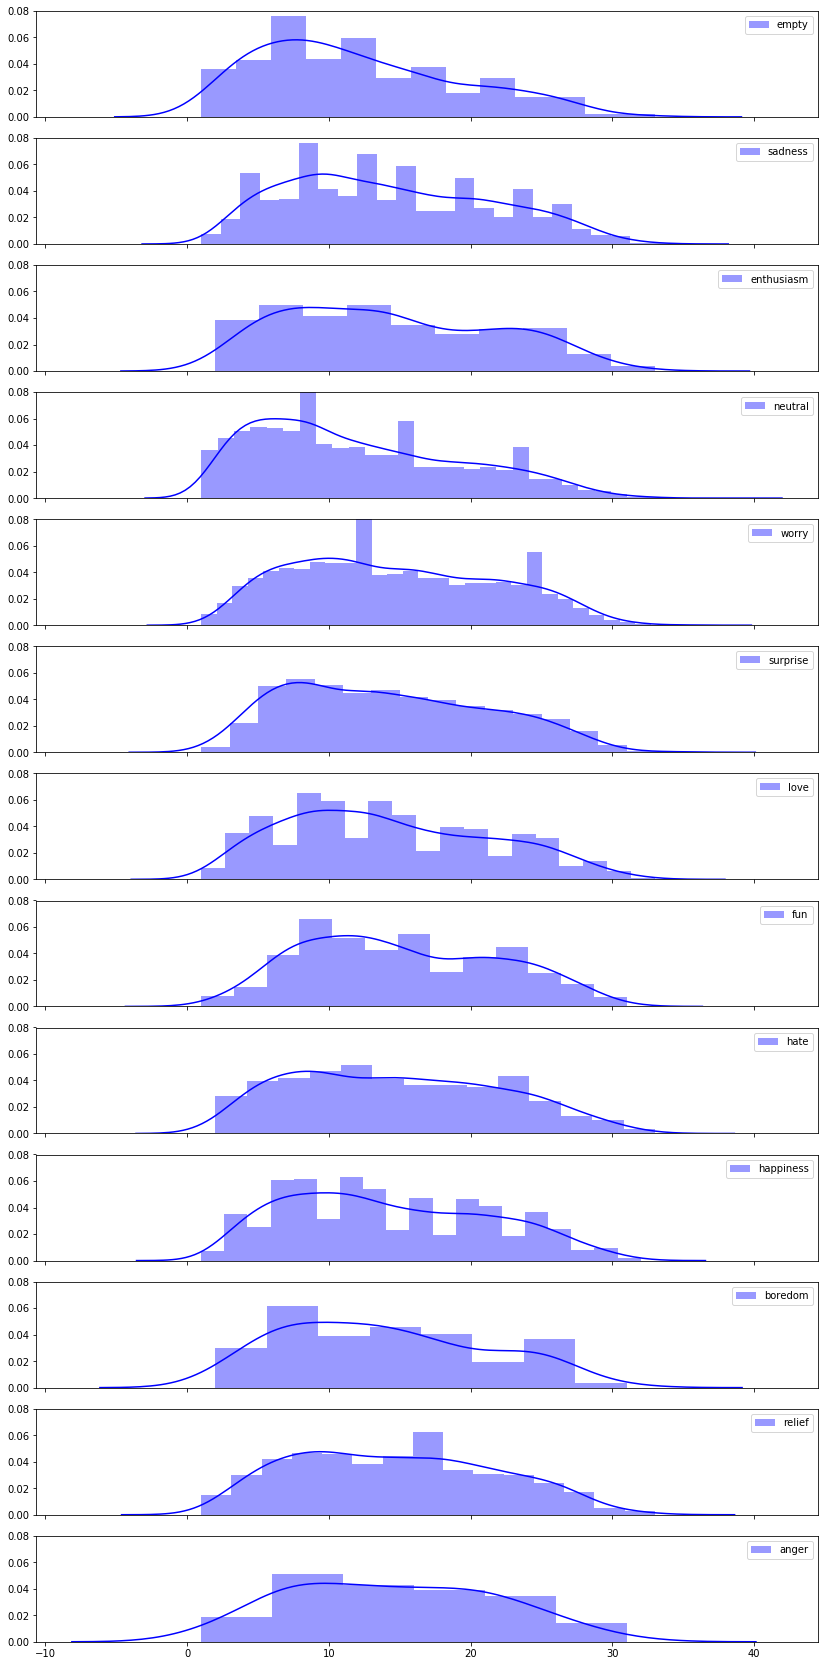

Time taken by above cell is 1.4750845432281494.


In [233]:
import seaborn as sns

fig, ax = plt.subplots(nrows=13, sharex=True, sharey=True, figsize=(14,30))
j = 0
for i in emotions:
    sns.distplot(data.loc[data['sentiment']==i]['word_count'].values, ax=ax[j], color='blue', label=i)
    ax[j].legend(loc=0)
    j = j + 1
plt.show()

#Вывод графиков: По оси X количество слов, по Y частота
#Идея заключалось в том, чтобы найти самый длинный хвост на графике у какого-то чувства, что могло бы стать доп. критерием.
#т.е. только это чувтсво имело бы такое большое/маленькое количество слов
#Однако из данных графиков видно что практически все чувства имеютт одинаковое распределение количества слов.

In [135]:
eng_stopwords = set(stopwords.words("english")) #Функция подсчета стоп слов для каждого чувства
def stopwords_count(row):
    text = row['content'].lower()
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    stopwords_count = len([w for w in text_splited if w in eng_stopwords])
    return (stopwords_count/word_count)

In [136]:
data['stopwords'] = data.apply(lambda row: stopwords_count(row), axis =1)

In [137]:
def punctuations_fraction(row): #Функция подсчета количества знаком препинания для каждого чувства
    text = row['content']
    char_count = len(text)
    punctuation_count = len([c for c in text if c in string.punctuation])
    return (punctuation_count/char_count)

In [138]:
data['punctuations'] = data.apply(lambda row: punctuations_fraction(row), axis =1)

In [139]:
def char_count(row): #Функция подсчета количества символов для каждого чувства
    return len(row['content'])

In [140]:
data['char'] = data.apply(lambda row: char_count(row), axis =1)

In [141]:
def fraction_noun(row): #Функция подсчета количества существительных для каждого чувства
    text = row['content']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    return (noun_count/word_count)

In [142]:
data['noun'] = data.apply(lambda row: fraction_noun(row), axis =1)

In [143]:
def fraction_adj(row): #Функция подсчета количества прилагательных для каждого чувства
    text = row['content']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    return (adj_count/word_count)

In [144]:
data['adj'] = data.apply(lambda row: fraction_adj(row), axis =1)

In [145]:
def fraction_verbs(row): #Функция подсчета количества глаголов для каждого чувства
    """function to give us fraction of verbs over total words in given text"""
    text = row['content']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return (verbs_count/word_count)

In [146]:
data['verb'] = data.apply(lambda row: fraction_verbs(row), axis =1)

In [246]:
data

,sentiment,content,proc_content,word_count,stopwords,punctuations,char,noun,adj,verb
0,empty,@tiffanylue i know i was listenin to bad habi...,i know i wa listenin to bad habit earlier and...,19,0.470588,0.032609,92,0.352941,0.058824,0.294118
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headach ughhhh waitin on y...,11,0.400000,0.100000,60,0.400000,0.000000,0.100000
2,sadness,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday,3,0.000000,0.171429,35,0.666667,0.333333,0.000000
3,enthusiasm,wants to hang out with friends SOON!,want to hang out with friend soon,7,0.428571,0.027778,36,0.285714,0.000000,0.285714
4,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someon who ha houston t...,15,0.533333,0.034884,86,0.266667,0.000000,0.200000
5,worry,Re-pinging @ghostridah14: why didn't you go to...,re ping whi didn t you go to prom bc my bf di...,15,0.333333,0.071429,84,0.400000,0.000000,0.200000
6,sadness,"I should be sleep, but im not! thinking about ...",i should be sleep but im not think about an o...,26,0.500000,0.075758,132,0.076923,0.153846,0.192308
7,worry,Hmmm. http://www.djhero.com/ is down,hmmm is down,4,0.500000,0.194444,36,0.500000,0.000000,0.250000
8,sadness,@charviray Charlene my love. I miss you,charlen my love i miss you,7,0.428571,0.051282,39,0.428571,0.000000,0.142857
9,sadness,@kelcouch I'm sorry at least it's Friday?,i m sorri at least it s friday,8,0.285714,0.095238,42,0.428571,0.285714,0.000000


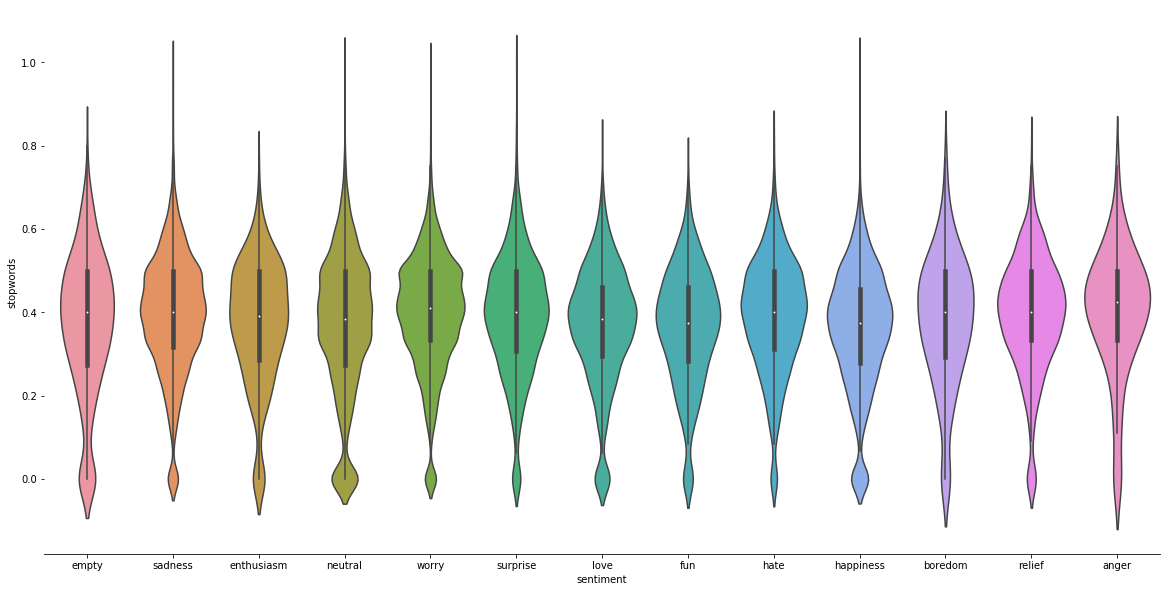

In [87]:
f, axes = plt.subplots(1,figsize=(20, 10), sharex=True, sharey = False)
sns.despine(left=True)
sns.violinplot(x="sentiment", y="stopwords", data=data )
sns.despine(left=True)

#Распределние стоп слов для каждого чувства. В среднем, твит состоит из 40% стоп слов независимо от эмоций.  
#Удаление стоп слов приведет к ухудшению результата, поэтому я решил их оставлять.

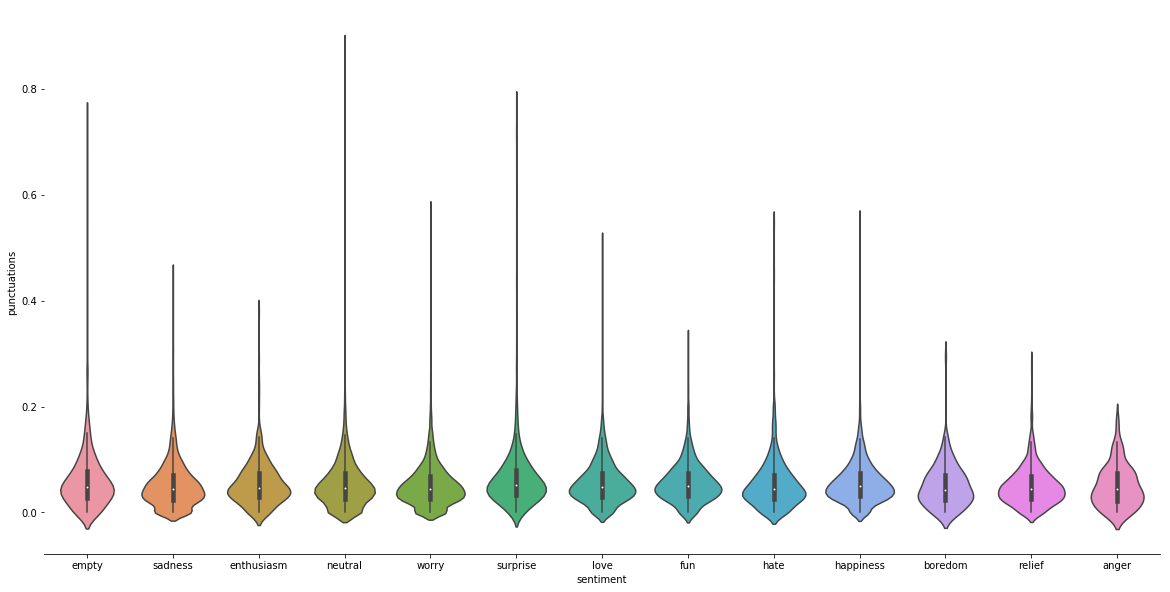

In [91]:
f, axes = plt.subplots(1,figsize=(20, 10), sharex=True, sharey = False)
sns.despine(left=True)
sns.violinplot(x="sentiment", y="punctuations", data=data )
sns.despine(left=True)

#По знакам пунктуации. В некоторых чувствах, например anger нету твитов с пунктуацией больше 20% твита. Скорее всего это связано
#с тем что для этого чувства очень мало данных.

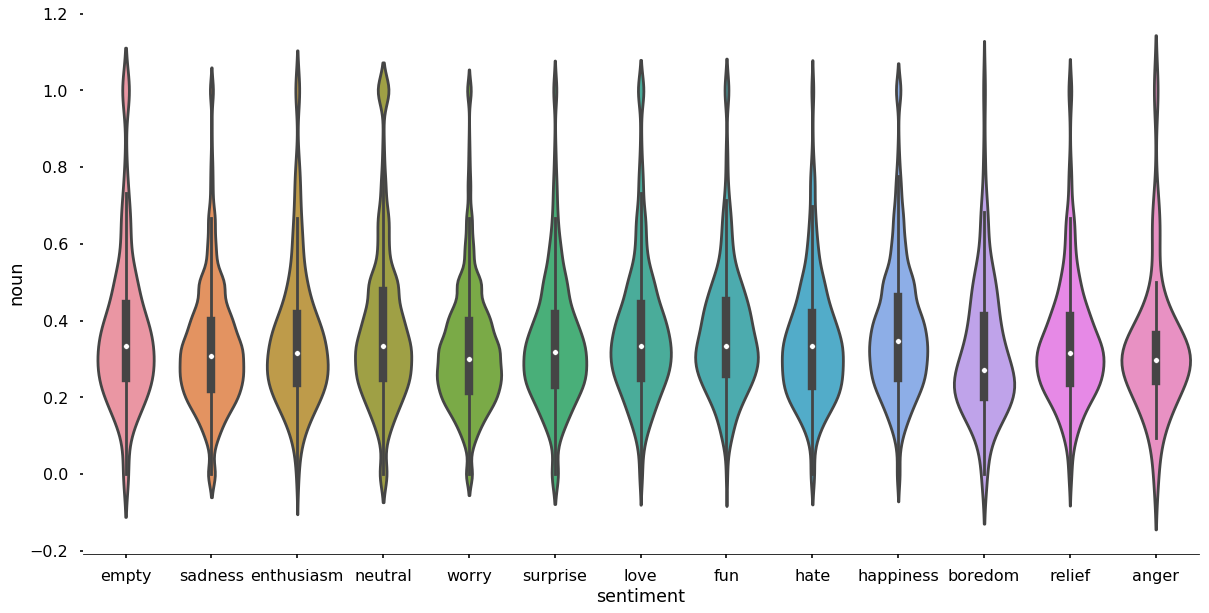

In [376]:
f, axes = plt.subplots(1,figsize=(20, 10), sharex=True, sharey = False)
sns.despine(left=True)
sns.violinplot(x="sentiment", y="noun", data=data )
sns.despine(left=True)

#В твите в среднем около 35 % существительных

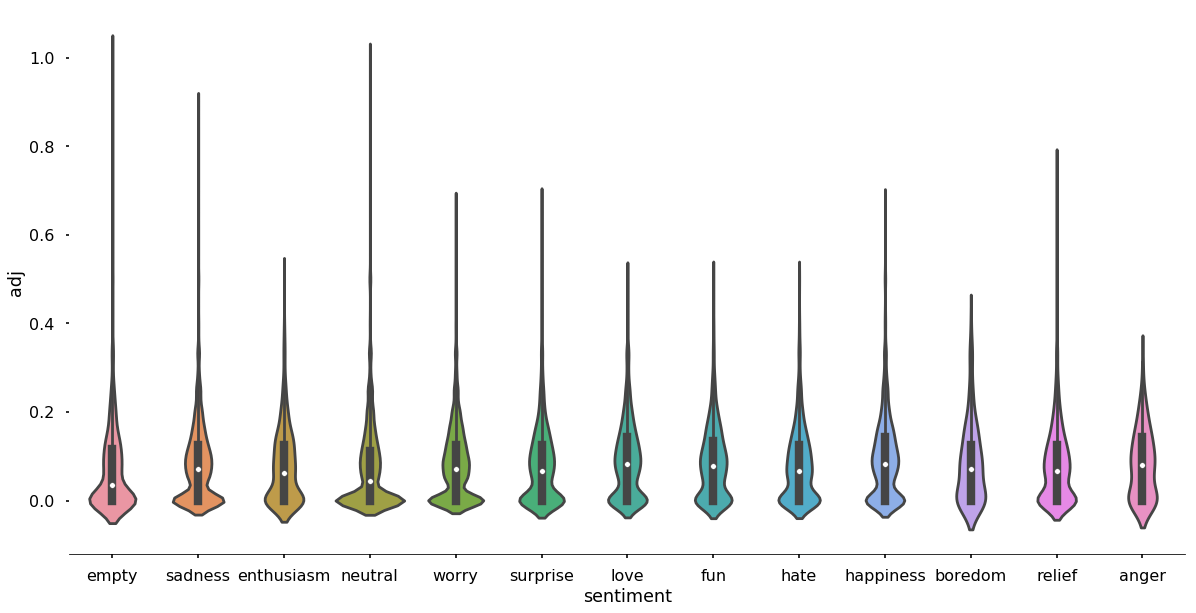

In [377]:
f, axes = plt.subplots(1,figsize=(20, 10), sharex=True, sharey = False)
sns.despine(left=True)
sns.violinplot(x="sentiment", y="adj", data=data )
sns.despine(left=True)

#Для прилогательных, слегка понижены значения empty и neutral. Похоже эти чувства сопровождаются меньшим количеством прилагательных

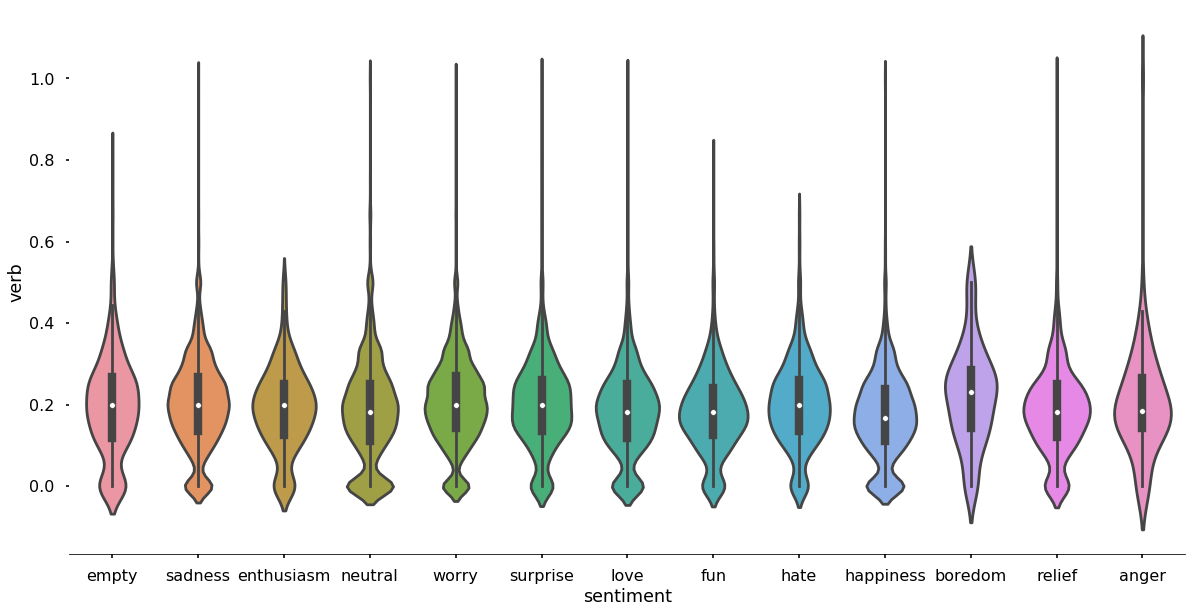

In [378]:
f, axes = plt.subplots(1,figsize=(20, 10), sharex=True, sharey = False)
sns.despine(left=True)
sns.violinplot(x="sentiment", y="verb", data=data )
sns.despine(left=True)

#По глаголам, в среднем 20%, только у boredom слегка смещено. 

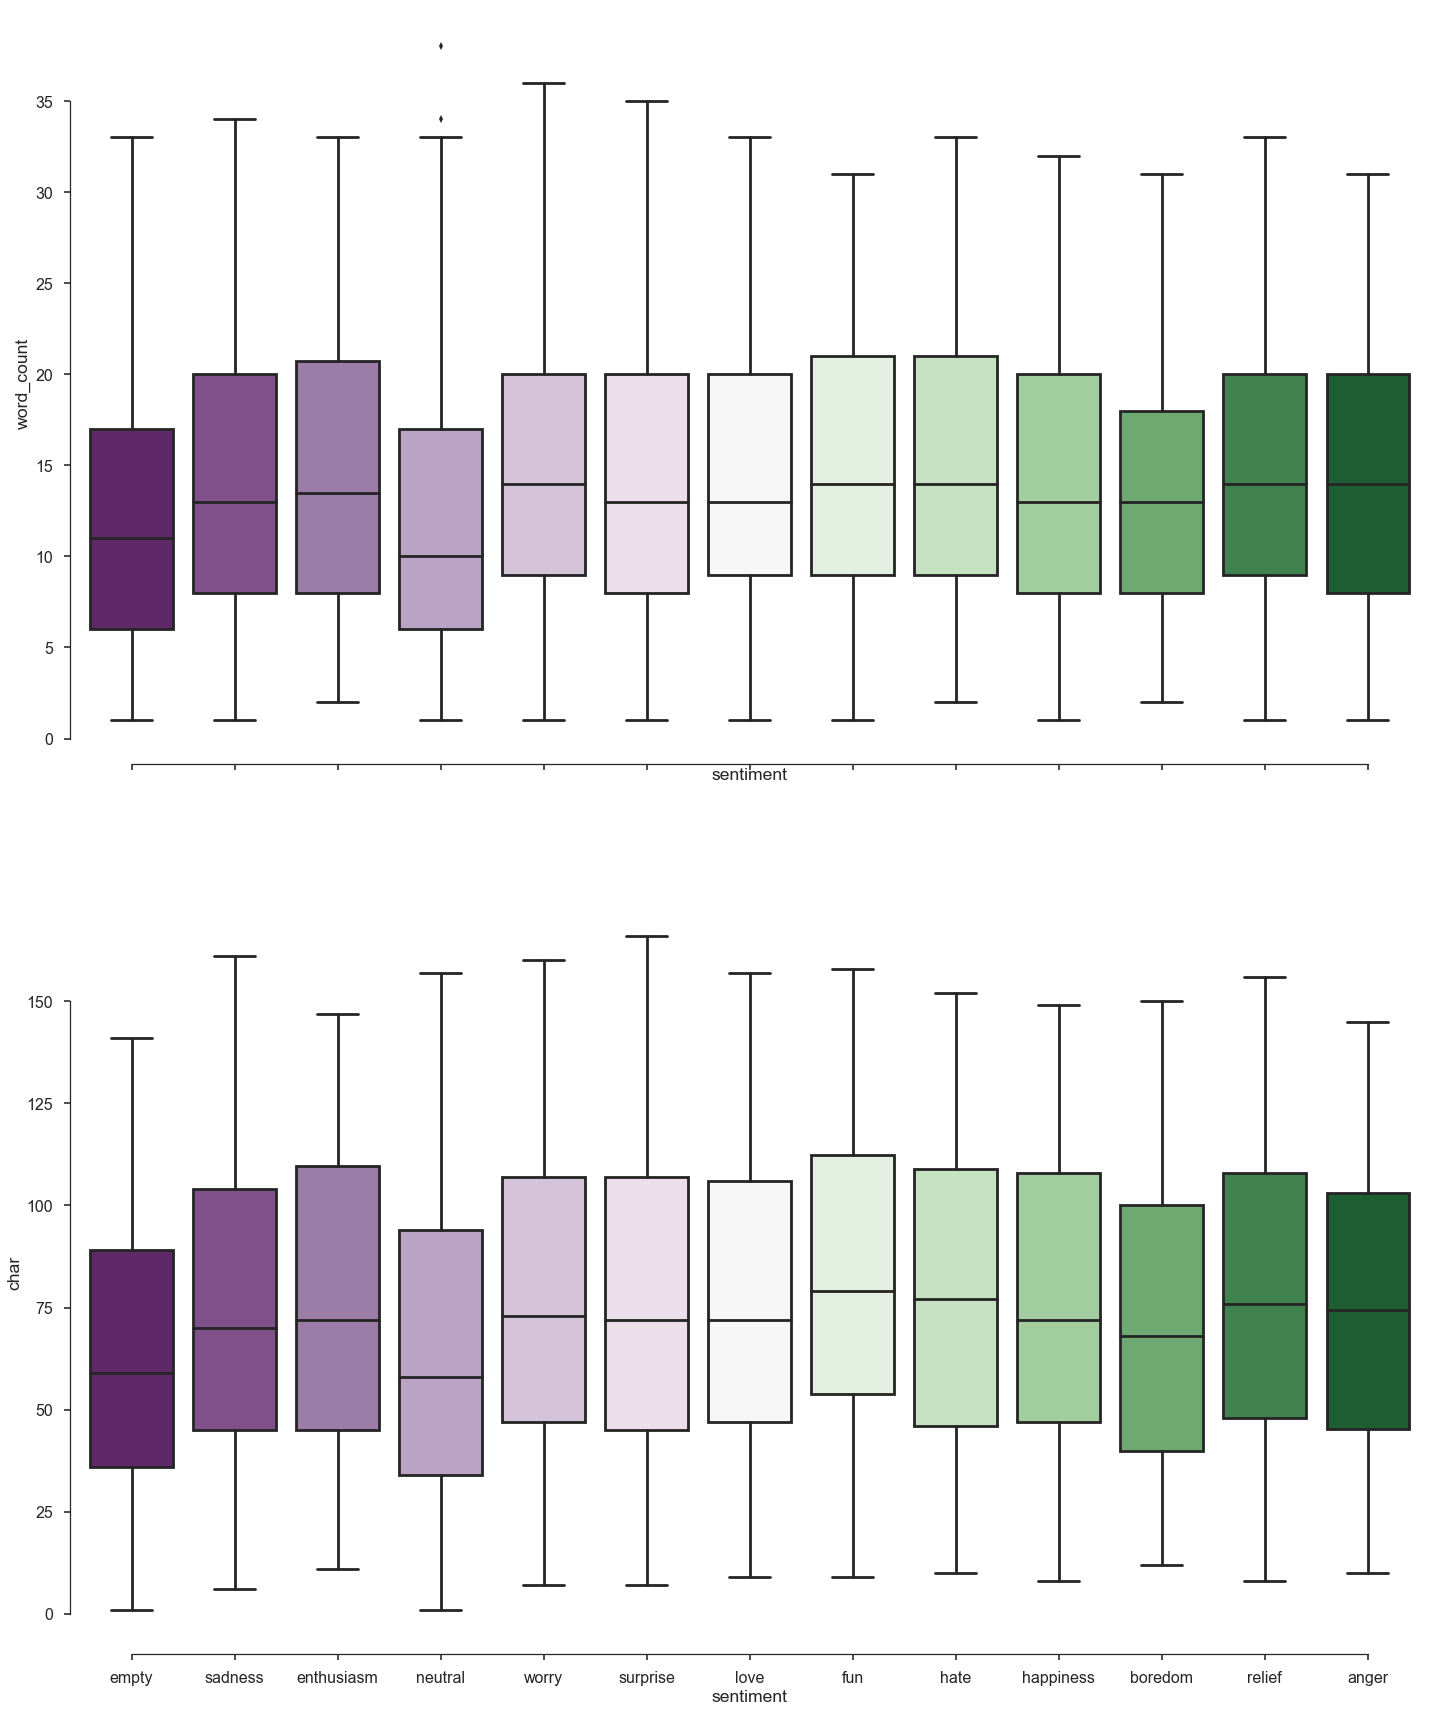

In [385]:
# Графики количества симоволов и слов в чувствах.
f, axes = plt.subplots(nrows=2, ncols=1,figsize=(24, 30), sharex=True, sharey = False)
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(y="word_count", x="sentiment", data=data, palette="PRGn", ax = axes[0])
sns.boxplot(y="char", x="sentiment", data=data, palette="PRGn", ax = axes[1])
sns.despine(offset=10, trim=True)
# Медианы заметно смещены у empty и neutral, эти чувства в среднем имеют меньшее количество слов и символов.

In [451]:
j = 1 #Нумеризовал классы в данных для просмотра корреляция
data["sentiment_number"] = 0
for i in emotions:
    data.set_value(data.sentiment == i,"sentiment_number",j)
    j = j + 1

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [428]:
data

,sentiment,content,word_count,unique_word_fraction,stopwords,punctuations,char,noun,adj,verb,sentiment_number
0,empty,@tiffanylue i know i was listenin to bad habi...,19,15,0.470588,0.032609,92,0.352941,0.058824,0.294118,1
1,sadness,Layin n bed with a headache ughhhh...waitin o...,11,10,0.400000,0.100000,60,0.400000,0.000000,0.100000,2
2,sadness,Funeral ceremony...gloomy friday...,3,3,0.000000,0.171429,35,0.666667,0.333333,0.000000,2
3,enthusiasm,wants to hang out with friends SOON!,7,7,0.428571,0.027778,36,0.285714,0.000000,0.285714,3
4,neutral,@dannycastillo We want to trade with someone w...,15,15,0.533333,0.034884,86,0.266667,0.000000,0.200000,4
5,worry,Re-pinging @ghostridah14: why didn't you go to...,15,13,0.333333,0.071429,84,0.400000,0.000000,0.200000,5
6,sadness,"I should be sleep, but im not! thinking about ...",26,24,0.500000,0.075758,132,0.076923,0.153846,0.192308,2
7,worry,Hmmm. http://www.djhero.com/ is down,4,4,0.500000,0.194444,36,0.500000,0.000000,0.250000,5
8,sadness,@charviray Charlene my love. I miss you,7,7,0.428571,0.051282,39,0.428571,0.000000,0.142857,2
9,sadness,@kelcouch I'm sorry at least it's Friday?,8,7,0.285714,0.095238,42,0.428571,0.285714,0.000000,2


In [419]:
numbers_feature = ["word_count","unique_word_fraction","stopwords","punctuations","char","noun","adj","verb","sentiment_number"]

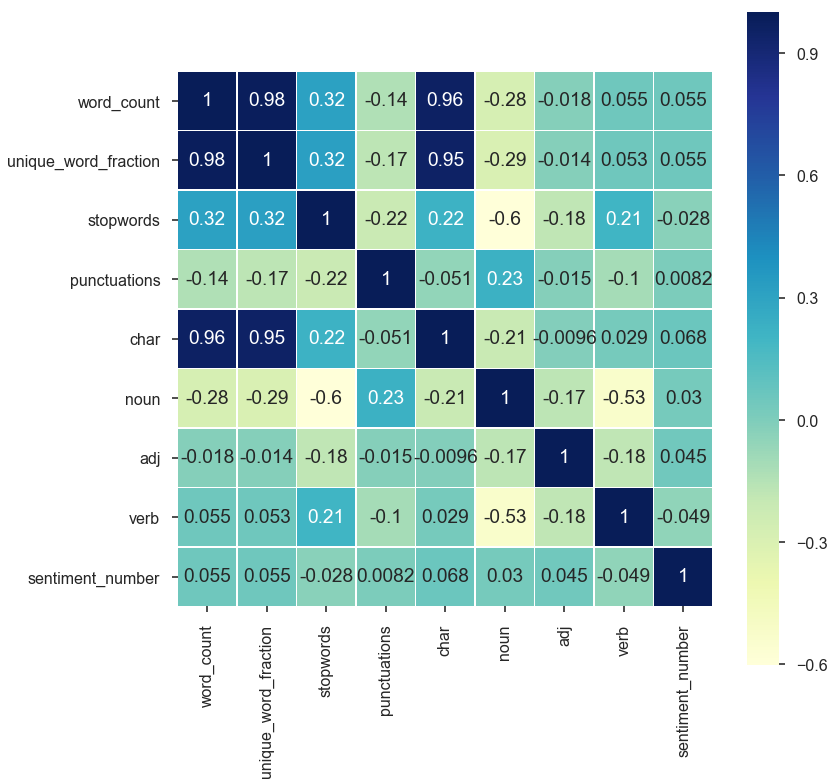

In [429]:
corrmat = data[numbers_feature].corr()
f, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="YlGnBu")
#Решил посмотреть корреляцию у новых признаков. С классами, к сожалению ничего не коррелирует, что было видно из графиков.
#Твиты имеют в среднем одинаковое количество глаголов, существительных, прилагательных, стопслов, знаков препинания, количества слов и символов.
#Для решения задачи классификации эти параметры никак не помогут нам. Судя по всему в твите важен только сам текст.

In [94]:
unique = {}
for column in data:
    unique[column] = len(data[column].unique())
print(sorted(unique.items(), key=lambda x: x[1]))

data = data.drop_duplicates('content')

[('sentiment', 13), ('stopwords', 207), ('punctuations', 1161), ('proc_content', 29419), ('content', 29939)]


In [95]:
%%time
#Предобработка текста
stops = set(stopwords.words("english"))     
i=0
proc_content = []
for text in data.content:
    raw_text = BeautifulSoup(text).get_text()
    no_authors = re.sub(r'@\w+', '', raw_text) #Удалил пользователей
    no_link = re.sub(r'http\S+', '', no_authors) #удалил ссылки
    no_link_2 = re.sub(r'www.\w+.\w+', '', no_link)
    letters_only = re.sub("[^a-zA-Z()]"," ", no_link_2 ) #оставил только алфавит и скобочки. Скобочки оставил так как в они
    lower_case = letters_only.lower()                    #могут содержать смысл смайликов что может помочь в анализе тональности.
    words = lower_case.split() #привел к нижнему регистру
    stemmer = PorterStemmer()  # Применил стемминг
    stemmed = ""
    for j in words:
        stemmed = stemmed + " " + str(stemmer.stem(j))
    proc_content.append(stemmed)
    if (i%900==0):
        print(stemmed)
    i+=1
data['proc_content'] = proc_content

C:\Users\Geka\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Geka\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


 i know i wa listenin to bad habit earlier and i start freakin at hi part
 but they are expens
 look at the sunshin out of my offic window
 it should be not a wink
 just got refus a bottl of morgan s in tesco despit say helen could verifi my age shock just left all the shop x
 nope no idea i ve regist so far no respons
 my bodi hurt i need a rub down like now
 wish she had a pool
 with e come up the worst possibl thing happen no not swine flu not aid rrod
 no just sit around sculpt tini koi
 it almost lunch time for you
 i have no one to watch it with ma peep are actual focus on their final alreadi
 i don t know i haven t heard from lorrain recent
 it hott out i think i shall go swim eh i feel empti had my dermal remov and took out some other pierc
 on the subject of frosti beer my bloodi fridg ha conk and my beer is warm
 have slept all afternoon and even after get back from nyc now feel bright as a button probabl a bad move
 want tfa back
 at marle doc appoint poor babygirl ha to get

In [96]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.preprocessing import sequence, text
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values) #Нумеризовал классы

In [97]:
xtrain, xvalid, ytrain, yvalid = train_test_split(data.proc_content, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1)
#сплитил данные

In [98]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)
#Векторизация №1

In [103]:
from sklearn.metrics import f1_score,log_loss

def predictionQuality(trueY, predY,predY_proba):
    print('ACCURACY: '+ str(accuracy_score(trueY, predY)))
    print ("LOGLOSS: " + str(multiclass_logloss(trueY, predY_proba)))


In [104]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict(xvalid_tfv)
predictions_proba = clf.predict_proba(xvalid_tfv)
predictionQuality(yvalid, predictions,predictions_proba)

ACCURACY: 0.3513694054776219
LOGLOSS: 1.8722081202747938


In [105]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3))
ctv.fit(list(xtrain) + list(xvalid))
xtrain_ctv =  ctv.transform(xtrain) 
xvalid_ctv = ctv.transform(xvalid)
#Векторизация №2

In [107]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, ytrain)
predictions = clf.predict(xvalid_ctv)
predictions_proba = clf.predict_proba(xvalid_ctv)
predictionQuality(yvalid, predictions,predictions_proba)

ACCURACY: 0.35103540414161655
LOGLOSS: 2.057185525650405


In [108]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap,)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


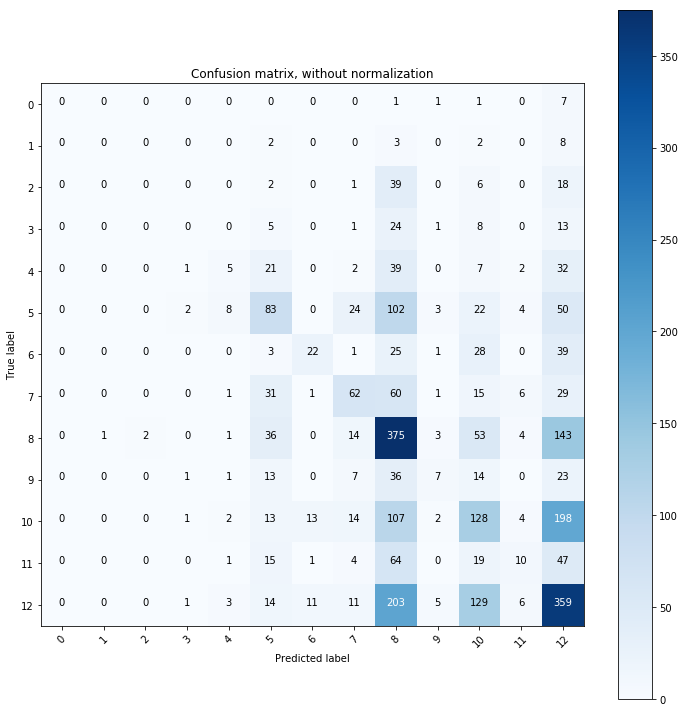

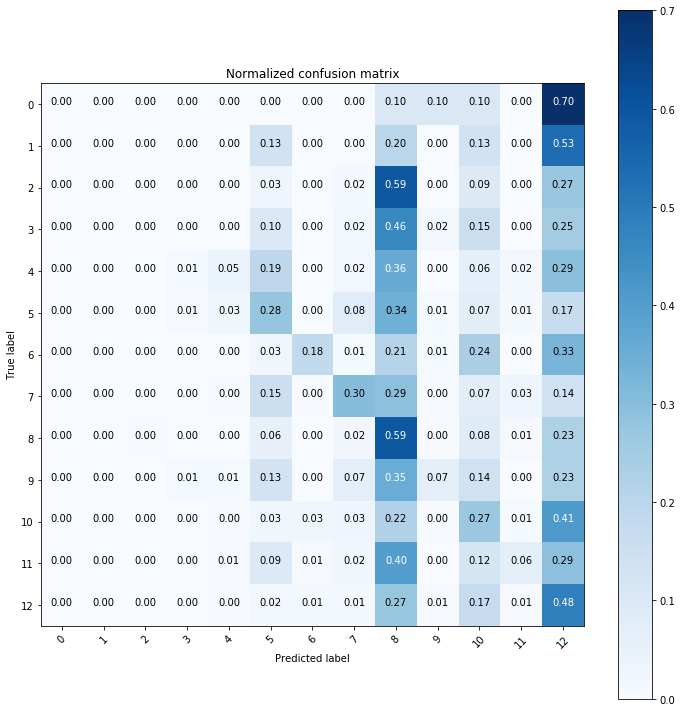

In [110]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(yvalid, predictions)
np.set_printoptions(precision=13)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12],
                      title='Confusion matrix, without normalization')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix,classes=[0,1,2,3,4,5,6,7,8,9,10,11,12], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

#Исходя из матрицы ошибок, можно заметить что основные предположения модель делает по 8 - neutral и 12 - worry чуваствам.
#Так как в данных больше всего данных этих классов, то основные предположения модель подставляет в них.
#Попробовал дальше использовать другие модели и изменять датасет.

In [114]:
clf = MultinomialNB()
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict(xvalid_tfv)
predictions_proba = clf.predict_proba(xvalid_tfv)
predictionQuality(yvalid, predictions,predictions_proba)


ACCURACY: 0.3046092184368738
LOGLOSS: 2.1747566262457187


Confusion matrix, without normalization
Normalized confusion matrix


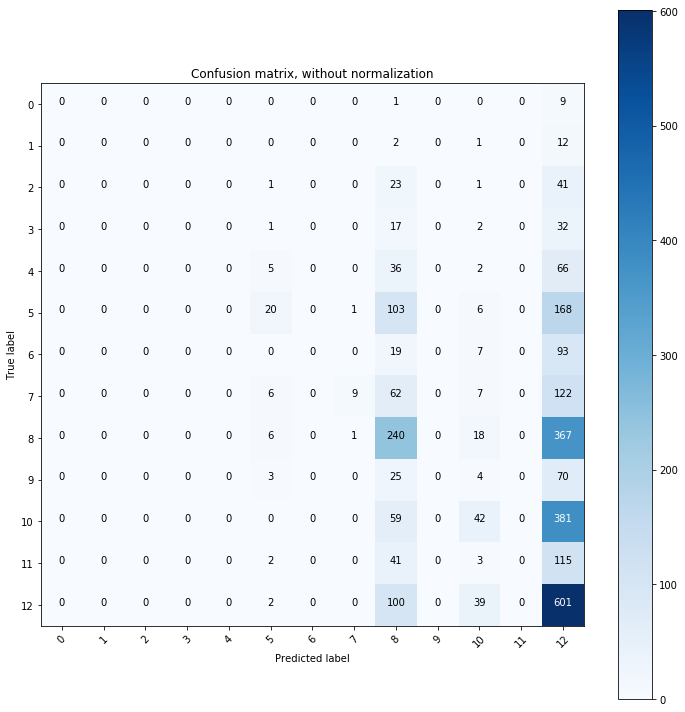

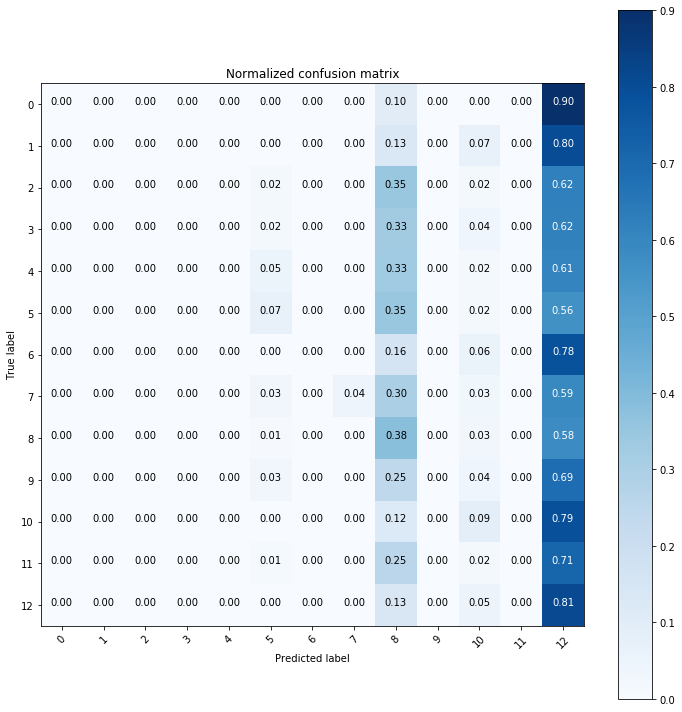

In [115]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(yvalid, predictions)
np.set_printoptions(precision=13)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12],
                      title='Confusion matrix, without normalization')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix,classes=[0,1,2,3,4,5,6,7,8,9,10,11,12], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [112]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_tfv.tocsc(), ytrain)
predictions = clf.predict_proba(xvalid_tfv.tocsc())
predictions = clf.predict(xvalid_tfv)
predictions_proba = clf.predict_proba(xvalid_tfv)
predictionQuality(yvalid, predictions,predictions_proba)

C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ACCURACY: 0.3603874415497662
LOGLOSS: 1.894782249444353


Confusion matrix, without normalization
Normalized confusion matrix


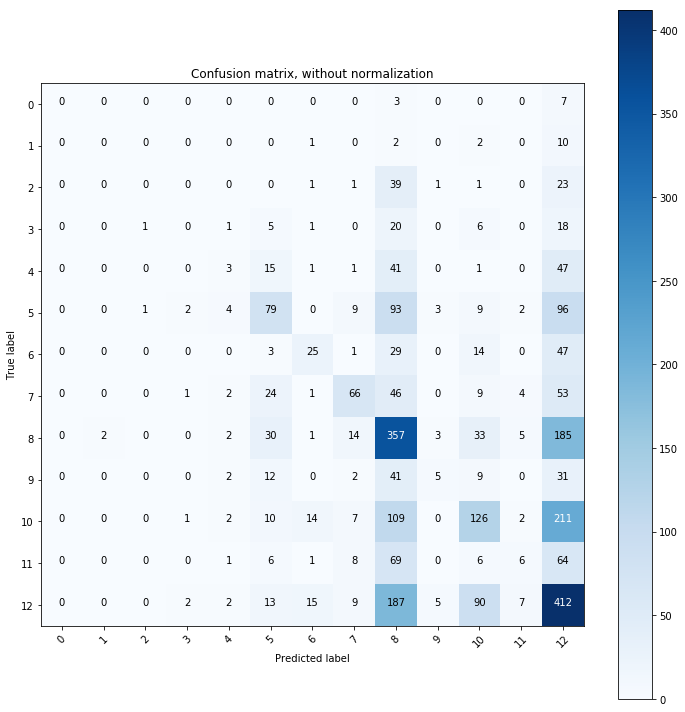

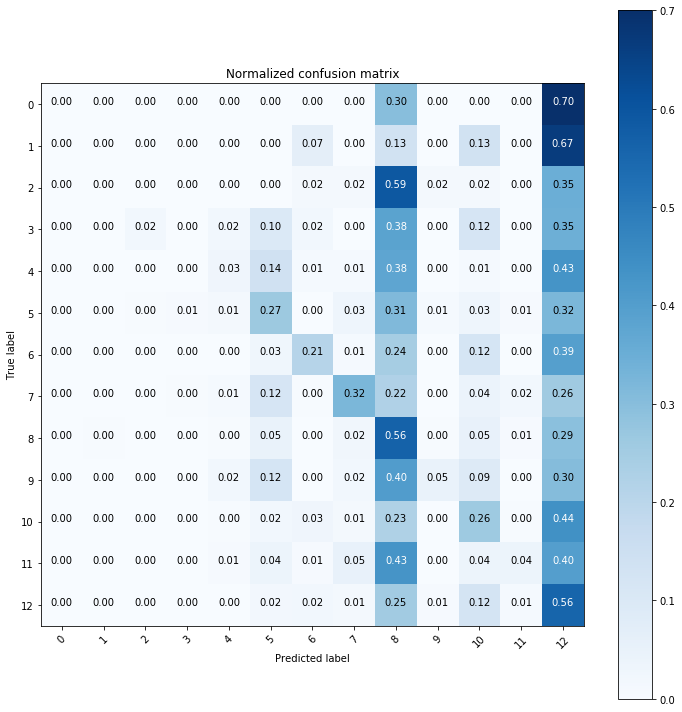

In [113]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(yvalid, predictions)
np.set_printoptions(precision=13)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12],
                      title='Confusion matrix, without normalization')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix,classes=[0,1,2,3,4,5,6,7,8,9,10,11,12], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [116]:
#Дальше попробовал, сгенерировать сбалансированную выборку использую Synthetic Minority Over-sampling Technique.
from imblearn.over_sampling import SMOTE 

In [117]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(xtrain_ctv, ytrain)

In [118]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({7: 6676, 8: 6676, 11: 6676, 12: 6676, 2: 6676, 6: 6676, 5: 6676, 9: 6676, 4: 6676, 10: 6676, 3: 6676, 1: 6676, 0: 6676})


In [119]:
# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
clf.fit(X_res, y_res)
predictions = clf.predict(xvalid_ctv)
predictions_proba = clf.predict_proba(xvalid_ctv)
predictionQuality(yvalid, predictions,predictions_proba)

ACCURACY: 0.2925851703406814
LOGLOSS: 2.45184598209675


Confusion matrix, without normalization
Normalized confusion matrix


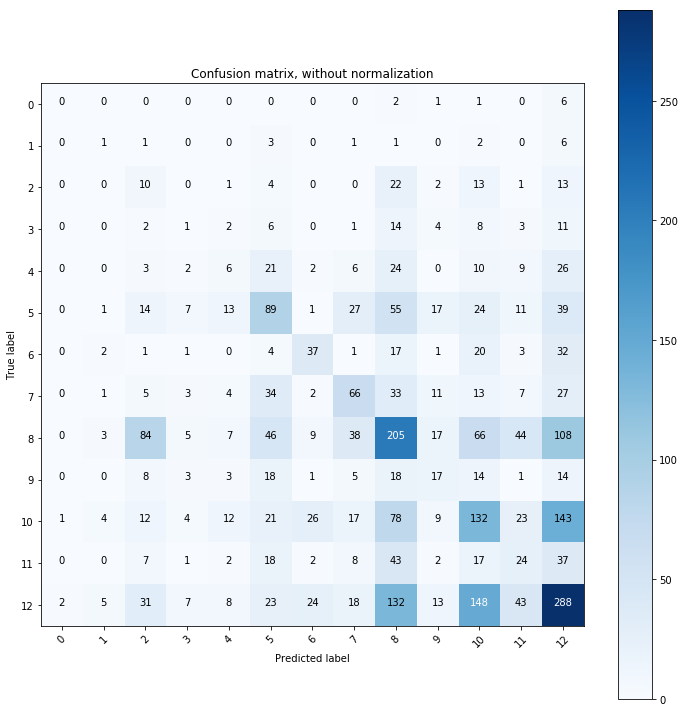

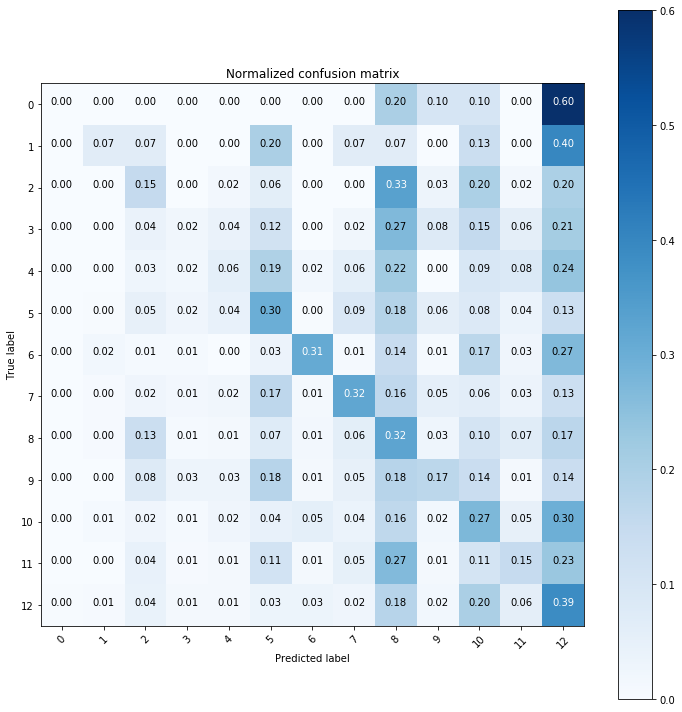

In [120]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(yvalid, predictions)
np.set_printoptions(precision=13)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12],
                      title='Confusion matrix, without normalization')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
#Так же решил попробовать небольшую нейронку

In [161]:
def preprocess(text):
    text = text.replace("' ", " ' ")
    signs = set(',.:;"?!')
    prods = set(text) & signs
    if not prods:
        return text

    for sign in prods:
        text = text.replace(sign, ' {} '.format(sign) )
    return text

In [162]:
def create_docs(df, n_gram_max=2):
    def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
        
    docs = []
    for doc in df.proc_content:
        doc = preprocess(doc).split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    
    return docs

In [169]:
min_count = 2
data2 = pd.DataFrame(data.proc_content)
docs = create_docs(data2)
tokenizer = Tokenizer(lower=False, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=False, filters='')
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)

maxlen = 256

docs = pad_sequences(sequences=docs, maxlen=maxlen)

In [170]:
docs

array([[    0,     0,     0, ...,   102,  3031,  9644],
       [    0,     0,     0, ..., 24133,  1299, 17306],
       [    0,     0,     0, ...,  8480,  2922,   240],
       ...,
       [    0,     0,     0, ...,   597,   874,   498],
       [    0,     0,     0, ...,  4311,  9391, 16357],
       [    0,     0,     0, ..., 40879,   656,  5955]])

In [171]:
input_dim = np.max(docs) + 1
embedding_dims = 20

In [172]:
def create_model(embedding_dims=30, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(13, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [173]:
a2c = {'empty':0, 'sadness':1, 'enthusiasm':2, 'neutral':3, 'worry':4, 'surprise':5,
       'love':6, 'fun':7, 'hate':8, 'happiness':9, 'boredom':10, 'relief':11, 'anger':12}
y = np.array([a2c[a] for a in data.sentiment])
y = to_categorical(y)

In [174]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
x_train,x_test,y_train,y_test = train_test_split(docs, y, stratify=y, test_size=0.1)

In [180]:
epochs = 25
model = create_model()
hist = model.fit(x_train, y_train,
                 batch_size=16,
                 validation_data=(x_test, y_test),
                 epochs=epochs, 
                 callbacks = [EarlyStopping(monitor='acc',  patience=2)]
                 )

Train on 26945 samples, validate on 2994 samples
Epoch 1/25
26945/26945 [==============================] - 38s 1ms/step - loss: 2.1371 - acc: 0.2464 - val_loss: 2.1002 - val_acc: 0.2478
Epoch 2/25
26945/26945 [==============================] - 35s 1ms/step - loss: 2.0937 - acc: 0.2496 - val_loss: 2.0927 - val_acc: 0.2478
Epoch 3/25
26945/26945 [==============================] - 35s 1ms/step - loss: 2.0788 - acc: 0.2694 - val_loss: 2.0794 - val_acc: 0.2709
Epoch 4/25
26945/26945 [==============================] - 34s 1ms/step - loss: 2.0557 - acc: 0.2987 - val_loss: 2.0614 - val_acc: 0.3009
Epoch 5/25
26945/26945 [==============================] - 35s 1ms/step - loss: 2.0250 - acc: 0.3152 - val_loss: 2.0429 - val_acc: 0.2892
Epoch 6/25
26945/26945 [==============================] - 33s 1ms/step - loss: 1.9862 - acc: 0.3253 - val_loss: 2.0184 - val_acc: 0.2979
Epoch 7/25
26945/26945 [==============================] - 35s 1ms/step - loss: 1.9414 - acc: 0.3445 - val_loss: 1.9986 - val_acc: